## Ajustes

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Primero vamos a trabajar con las estandarizadas e incoding.

In [4]:
df = pd.read_csv("../ficheros/02-Churm_estand_encod.csv", index_col= 0)
df.head()

,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,1,-0.332983,0.490105,-1.041760,-1.225848,0.021886,1,0,0,1,0
1,1,0,1,0,-0.447572,0.374424,-1.387538,0.117350,0.216534,0,0,1,1,0
2,3,1,0,1,-1.551792,0.490105,1.032908,1.333053,0.240687,1,0,0,1,0
3,2,0,0,0,0.500391,0.143063,-1.387538,-1.225848,-0.108918,1,0,0,1,0
4,1,1,1,0,2.073384,0.605786,-1.041760,0.785728,-0.365276,0,0,1,1,0


In [6]:
# separamos los datos en X e y

X1 = df.drop("Exited", axis = 1)
y1 = df["Exited"]

In [8]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [9]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [10]:
# hacemos un dataframe para comparar los resultados
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
9254,0,0,Train
1561,0,0,Train
1670,1,0,Train
6087,1,0,Train
6669,1,1,Train


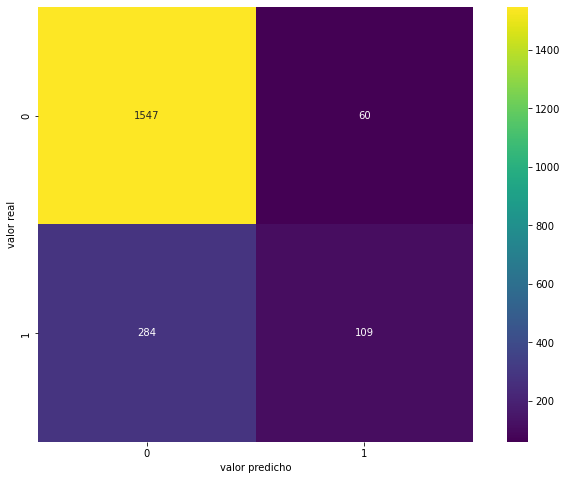

In [11]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

En nuestro caso  
0: retained (Se quedan en el banco)
1: exited (Se van del banco)

Respecto a los positivos tenemos unos resultados buenos porque hemos acertado 1547, frente a los 60 casos positivo se ha confundido y son negativos.
Respectoo a los negativos tenemos peorers resultados solo 109 casos se han ido y lo ha predicho como tal frente a 284 que se han ido pero nuestro test a pensado que se quedarian
Con lo cual este es nuestro  mejor resultado, porque nos hemos confundido en los casos que creiamos ques e iban pero en realidad se han quedado, y eso es bueno para nosotras.

Ahora procedemos con los encoding sin estandarizar,

In [13]:
df2 = pd.read_csv("../ficheros/03-Churm_encoding.csv", index_col= 0)
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [14]:
# separamos los datos en X e y

X2 = df2.drop("Exited", axis = 1)
y2 = df2["Exited"]

In [15]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [16]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test2)

In [17]:
# hacemos un dataframe para comparar los resultados
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head()

,Real,Predicted,Set
9254,0,0,Train
1561,0,0,Train
1670,1,0,Train
6087,1,0,Train
6669,1,1,Train


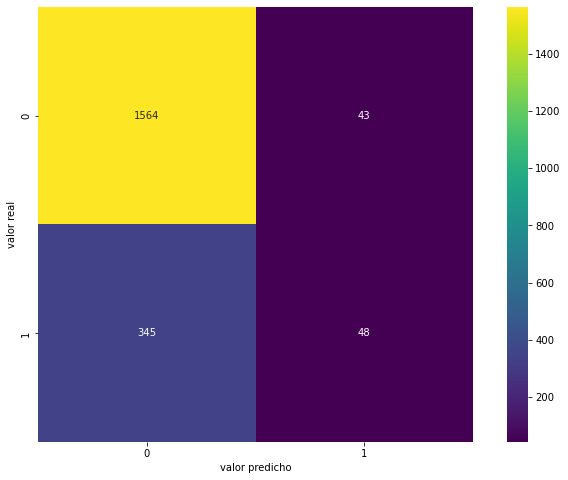

In [18]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Nos da practicamente lo mismo, pero los positivos hemos mejorado ligeramente, y los negativos empeorado bastante.

Ahora balanceados estandarizados

In [19]:
df3 = pd.read_csv("../ficheros/04-Churm_balan_estan.csv", index_col= 0)
df3.head()

,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,1,1,0,-2.260159,-0.088299,1.378686,0.689342,0.447917,0,1,0,0,1,0
1,1,1,0,0.375385,-0.435342,-0.004426,0.829959,1.582440,1,0,0,0,1,0
2,3,1,1,-2.020565,0.374424,1.032908,-0.044648,1.489538,1,0,0,0,1,1
3,1,0,0,0.239962,0.143063,0.341352,0.700505,0.000708,0,0,1,0,1,0
4,1,1,1,0.823323,0.605786,-1.387538,0.440337,1.626914,0,0,1,1,0,0


In [20]:
# separamos los datos en X e y

X3 = df3.drop("Exited", axis = 1)
y3 = df3["Exited"]

In [21]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [22]:
# definimos la regresión logistica

log_reg_esta_balan = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta_balan.fit(x_train3,y_train3)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta_balan = log_reg_esta_balan.predict(x_train3)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta_balan = log_reg_esta_balan.predict(x_test3)

In [23]:
# hacemos un dataframe para comparar los resultados
train_df_esta_balan = pd.DataFrame({'Real': y_train3, 'Predicted': y_pred_train_esta_balan, 'Set': ['Train']*len(y_train3)})
test_df_esta_balan  = pd.DataFrame({'Real': y_test3,  'Predicted': y_pred_test_esta_balan,  'Set': ['Test']*len(y_test3)})
resultados3 = pd.concat([train_df_esta_balan,test_df_esta_balan], axis = 0)
resultados3.head()

,Real,Predicted,Set
3790,0,0,Train
4502,1,1,Train
5940,0,1,Train
5858,1,1,Train
3334,0,0,Train


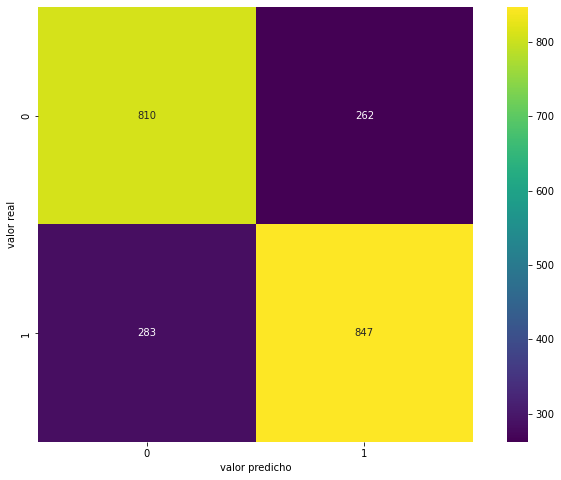

In [24]:
mat_lr3 = confusion_matrix(y_test3, y_pred_test_esta_balan)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr3, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Aqui podemos ver que los resultados estan más igualados entre positivos y negativos, es decir que tenemos una buena propporcion de verdaderos positivos y verdaderos negativos.


Ahora vamos a utilizar balanceados sin estandarizar

In [25]:
df4 = pd.read_csv("../ficheros/05-Churm_balan_sinest.csv", index_col= 0)
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,775,29,10,0.00,2,1,1,68143.93,0,0,1,0,1,0
1,647,26,8,109958.15,1,1,1,136592.24,0,0,1,1,0,1
2,576,41,4,112609.91,1,0,0,191035.18,1,0,0,1,0,1
3,624,38,7,123906.55,1,1,0,135096.78,0,0,1,0,1,0
4,599,39,4,0.00,1,1,0,194273.20,0,0,1,1,0,1


In [26]:
# separamos los datos en X e y

X4 = df4.drop("Exited", axis = 1)
y4 = df4["Exited"]

In [27]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 42)

In [28]:
# definimos la regresión logistica

log_reg_balan = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_balan.fit(x_train4,y_train4)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_balan = log_reg_balan.predict(x_train4)

# obtenemos las predicciones para el conjunto de test
y_pred_test_balan = log_reg_balan.predict(x_test4)

In [29]:
# hacemos un dataframe para comparar los resultados
train_df_balan = pd.DataFrame({'Real': y_train4, 'Predicted': y_pred_train_balan, 'Set': ['Train']*len(y_train4)})
test_df_balan  = pd.DataFrame({'Real': y_test4,  'Predicted': y_pred_test_balan,  'Set': ['Test']*len(y_test4)})
resultados4 = pd.concat([train_df_balan,test_df_balan], axis = 0)
resultados4.head()

,Real,Predicted,Set
8168,1,1,Train
6392,1,0,Train
81,1,0,Train
1323,1,1,Train
9032,1,1,Train


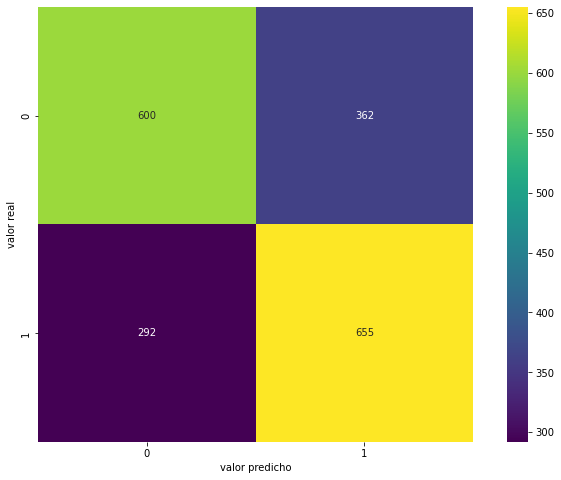

In [30]:
mat_lr4 = confusion_matrix(y_test4, y_pred_test_balan)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr4, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()